<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_5_Neural_Network_in_Tensorflow_and_Pytouch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import classification_report

In [9]:
# Set global parameters
num_epochs = 10
learning_rate = 0.001

# Load dataset
fmnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fmnist.load_data()

# Normalize the pixel value of images
x_train = x_train / 255.0
x_test = x_test / 255.0

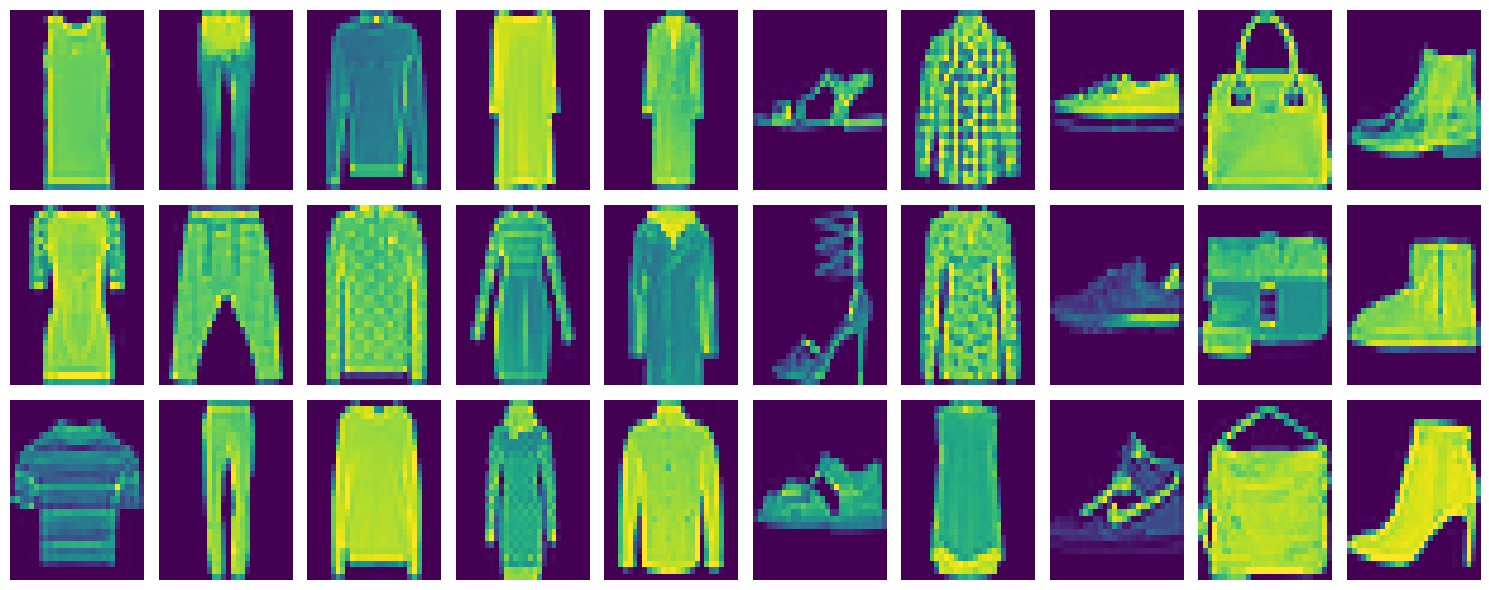

In [3]:
# Number of examples to show per class
examples_per_class = 3
number_of_classes = np.unique(y_train)

fig,axes = plt.subplots(nrows = examples_per_class,ncols = len(number_of_classes), figsize = (15,6))

for i, cls in enumerate(number_of_classes):
  # Find the indices of images of class i
  # np.flatnonzero = Get the indices of non-zero elements in the flattened array
  idxs = np.flatnonzero(y_train == i)
  idxs = np.random.choice(idxs,examples_per_class,replace = False)
  for j in range(examples_per_class):
    # Plot each example
    ax = axes[j][i]
    ax.imshow(x_train[idxs[j]],aspect = 'auto')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate =learning_rate),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs = num_epochs,
    validation_data = (x_test,y_test),
    # The number of processes to use for data preprocessing during training.
    workers = 4 # Run parallelly
)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2407 - accuracy: 0.9096 - val_loss: 0.2714 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2242 - accuracy: 0.9159 - val_loss: 0.2803 - val_accuracy: 0.8969
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2137 - accuracy: 0.9190 - val_loss: 0.2606 - val_accuracy: 0.9090
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1990 - accuracy: 0.9243 - val_loss: 0.2628 - val_accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1888 - accuracy: 0.9272 - val_loss: 0.2663 - val_accuracy: 0.9043
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1794 - accuracy: 0.9316 - val_loss: 0.2742 - val_accuracy: 0.9065
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1708 - accuracy: 0.9350 - val_loss: 0.2775 - val_accu

<Figure size 640x480 with 0 Axes>

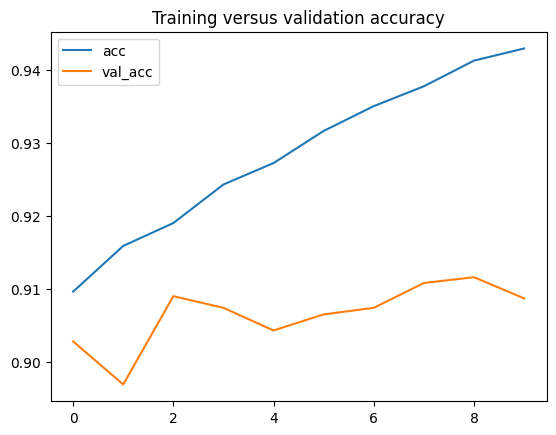

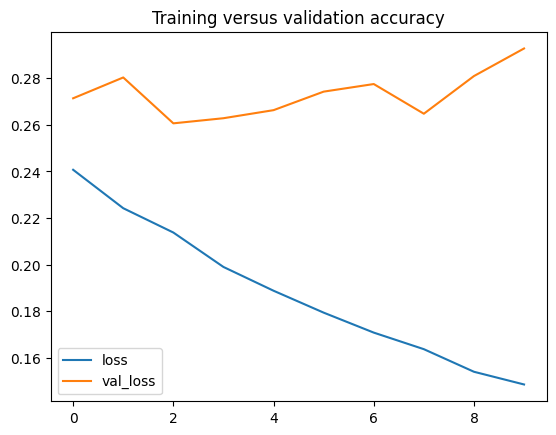

<Figure size 640x480 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy per epoch
plt.plot(range(num_epochs),acc,label = 'acc')
plt.plot(range(num_epochs),val_acc,label = 'val_acc')
plt.title('Training versus validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(range(num_epochs),loss,label = 'loss')
plt.plot(range(num_epochs),val_loss,label = 'val_loss')
plt.title('Training versus validation accuracy')
plt.legend()
plt.figure()

In [14]:
predictions  = model(x_test)
predictions = predictions.numpy()
predictions_labels = np.argmax(predictions,axis = 1)

In [15]:
rep = classification_report(y_test,predictions_labels)
print(rep)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.90      0.86      1000
           3       0.95      0.90      0.92      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.66      0.71      1000
           7       0.95      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

